# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the famous "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Build many linear models with the Boston housing data using OLS
* Analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [53]:
# Your code here
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd 
import numpy as np

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Target'] = pd.Series(boston.target)

The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [3]:
# Your code here
boston_df.head()
boston_df.describe()
# boston_df.isna().sum()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Record your observations here 
# CRIM has a heavy left skew, looking at the quartiles
# ZN does as well, with the bulk of the data being zeros
# INDUS has more varied data than CRIM and ZN, but the mean is higher than the median, skewed right
# CHAS is not going to be a use category
# NOX has varied data, with the mean and the median being almost equal -- possible coorelation here
# RM has varied data, with the mean and the median being almost equal -- possible coorelation here
# AGE has varied data, where the mean is less than the median, so there is a skew to the left
# DIS has varied data, with the mean and median being almost equal -- possible coorelation
# RAD is not going to be a useful category - categorical in nature
# TAX is not going to be a useful category - categorical in nature
# PTRATIO has varied data, with the mean and median being almost equal -- possible coorelation
# B has varied data, where the mean is less than the median, so there is a skew to the left
# LSTAT has varied data, with the mean and median being almost equal -- possible coorelation
# TARGET has varied data, with the mean and median being almost equal -- possible correlation

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

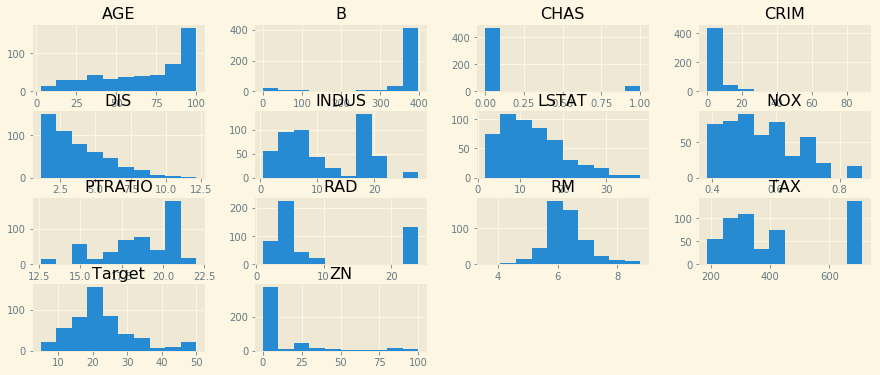

In [22]:
# Your code here 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('Solarize_Light2')

boston_df.hist(figsize=(15,6));

In [116]:
# You observations here 
# Age is skewed right
# B is garbage
# CHAS is garbage
# CRIM is skewed left
# DIS is skewed left
# INDUS is missing the middle
# LSTAT is skewed left
# NOX is skewed left
# PTRATIo looks promising
# RAD is garbage
# RM looks great, if a little tall
# TAX looks like garbage, possible outliers
# TARGET look great!
# ZN is skewed left - maybe some 0 values that are supposed to be n/a

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [23]:
# Your code here
frames = [boston_df['CRIM'], boston_df['DIS'], boston_df['RM'], boston_df['ZN'], boston_df['AGE'], boston_df['Target']]
boston_df_more_normal = pd.concat(frames, axis=1, join='outer', sort=True)
original_columns = boston_df_more_normal.columns
new_columns = ['crim', 'dis', 'rm', 'zn', 'age', 'medv']
boston_df_more_normal.columns = new_columns

### Check for linearity assumption for all chosen features with target variable using scatter plots

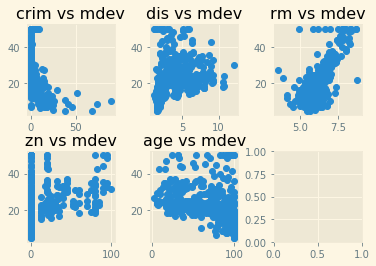

In [112]:
# Your code here 
y = boston_df_more_normal['medv']
# x_array = np.array(x)
# plot_x = pd.DataFrame([x_array]*6).transpose()
# plot_x.columns = ['medv', 'medv', 'medv', 'medv', 'medv', 'medv']

fig, axes = plt.subplots(nrows=2, ncols=3, squeeze=False)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# for j in range(2):
#     for k in range(3):
#         y = pd.DataFrame([boston_df_more_normal[n] for n in boston_df_more_normal.columns])
#         plot_y = pd.DataFrame([y[i] for i in y.columns])
#         ax[j, k].scatter(plot_x,plot_y)
# for n in range(1,6):
#     row = (n-1)//3
#     col = n%3-1
#     ax = axes[row][col]
#     ax.scatter(plot_x,plot_y)
# print(x_arrays)
# print(plot_y)
x = pd.DataFrame([boston_df_more_normal[n] for n in boston_df_more_normal.columns])
plot_x = pd.DataFrame([x[i] for i in x.columns])

axes[0,0].scatter(plot_x['crim'], y)
axes[0,0].set_title('crim vs mdev')
axes[0,1].scatter(plot_x['dis'], y)
axes[0,1].set_title('dis vs mdev')
axes[0,2].scatter(plot_x['rm'], y)
axes[0,2].set_title('rm vs mdev')
axes[1,0].scatter(plot_x['zn'], y)
axes[1,0].set_title('zn vs mdev')
axes[1,1].scatter(plot_x['age'], y)
axes[1,1].set_title('age vs mdev');

In [ ]:
# Your observations here 
# crim and zn coult maybe use a log transformation
# rm is a really good candidate for linear regression already
# dis and age could use some work, but I don't know what that would look like

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll the dataset untouched and just move on with the regression. The assumptions are _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

In [ ]:
# Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols
# build the formula 
f1 = 'mdev~crim'
f2 = 'mdev~dis'
f3 = 'mdev~rm'
f4 = 'mdev~zn'
f5 = 'mdev~age'
# create a fitted model in one line
model1 = ols(formula=f1, data=boston_df_more_normal).fit()
model2 = ols(formula=f2, data=boston_df_more_normal).fit()
model3 = ols(formula=f3, data=boston_df_more_normal).fit()
model4 = ols(formula=f4, data=boston_df_more_normal).fit()
model5 = ols(formula=f5, data=boston_df_more_normal).fit()

In [8]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,crim,0.15078,24.0331,-0.41519,1.17399e-19,295.404
2,dis,0.0624644,18.3901,1.09161,1.20661e-08,305.104
3,rm,0.483525,-34.6706,9.10211,2.48723e-74,612.449
4,zn,0.129921,20.9176,0.14214,5.71358e-17,262.387
5,age,0.142095,30.9787,-0.123163,1.56998e-18,456.983


In [118]:
#Your observations here 


Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is uour best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore at multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.